# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- 여기서 사용한 example은 윤동주 시인의 작품 전체와, 궁서체의 '동주'라는 (1024, 512) pixel의 이미지를 사용하였다.

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [43]:
# conda install -c conda-forge wordcloud
# pip install palettable
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "basketball"
icon_path = "%s.png" % icon

In [57]:
# 문재인 대통령 연설문 
#-*- coding: utf-8 -*-
f = open("Dear Basketball.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

친애하는 농구에게
아버지의 양말을 돌돌 말아
그레이트 웨스턴 포럼에서 위닝샷을 날리는 상상을 하기 시작한 그 순간부터
한가지는 확실했어 내가 너와 사랑에 빠졌다는것을
사랑이 너무 깊어서 내 모든 걸 바쳤어
내 마음과 몸에서부터 정신과 영혼까지
여섯살 짜리 꼬마는 너와 깊은 사랑에 빠졌고
나는 터널의 끝으 보지 않았어
터널을 뛰어나가는 나를 보았을 뿐
난 계속 달렸어
루즈볼을 잡으려고 코트를 누비며
네가 나에게 허슬을 요구하면 너에게 내마음을 바쳤어
그럴때 마다 더 많은 게 되돌아왔으니까
난 땀과 상처속에서 뛰었어
단지 도전의식 때문이 아니라
바로 네가 날 불렀으니까
난모든 걸 다했어 너를 위해
네가 날 살아있게 했으니까
넌 여섯살 짜리 꼬마에게 레이커의 여정을 선사했어
항상 그점에 대해 고맙게 생각해
하지만 이제 더 이상 너에게 사랑을 줄 수 없을 것 같아
이번 시즌이 내 모든 걸 바칠 수 있는 마지막이야
내 심장은 여전히 뛰고
내 정신도 버틸 수 있지만
내 몸이 작별할 시간이라고 하네
괜찮아 난 널 보내줄 준비가 끝났어
너도 이제는 알았으면 해
우리가 함께했던 모든 행복했던 순간들을 보내줘야 한다는 것을
좋은 것이든 나쁜것이든 우리는 서로를 위해 모든 걸 주었어
우리는 서로 잘 알잖아
내가 미래에 어떤 일을 하든 
난 언제나 양말을 쥐고 구석의 쓰레기통에 슛을 하며 5초를 세고 있는
그때의 그 꼬마라는걸 말이야 
5
4
3
2
1
언제나 너를 사랑하는 코비가


In [58]:
# 김정은 국무위원장 연설문 
#-*- coding: utf-8 -*-
f = open("Jordan.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

친애하는 농구,

우리가 만난 첫 날부터 거의 28 년이 지났습니다. 28 년 동안 우리 차고 뒤에서 봤어. 부모님이 우리를 소개 한 지 28 년이 지났어.

누군가가 나에게 말하면, 우리가 어떻게 될지, 내가 그들을 믿었을지 모르겠다. 나는 너의 이름을 간신히 기억했다.

그 다음 나는 네가 근처에서 너를보고 TV에서 너를 지켜보기 시작했다. 나는 놀이터에서 친구들과 함께 당신을 만났습니다. 그러나 형이 너에게 더 많은 관심을 기울이기 시작했을 때, 나는 궁금해하기 시작했다. 어쩌면 당신은 다르다.

우리는 몇 번이나 놀았다. 내가 너를 더 많이 알면할수록 널 좋아 해. 그리고 인생이 그것을 얻었을 때, 마침내 나는 정말로 당신에게 관심이 많았습니다. 마침내 진지해 질 준비가되었을 때, 당신은 저를 상대로 떠났습니다. 너는 내가 충분히 좋지 않다고 말했다.

나는 부서졌다. 나는 상처 받았다. 나는 심지어 울었다 고 생각한다.

그렇다면 나는 당신을 그 어느 때보 다 더 원했습니다. 그래서 나는 연습했다. 나는 사기 쳤다. 나는 내 게임에서 일했다.

통과. 드리블. 촬영. 생각. 나는 달렸다. 나는 윗몸 일으키기를했다. 나는 팔 굽혀 펴기를했다. 나는 풀업을했다. 나는 무게를 들었다. 너를 공부 했어. 나는 사랑에 빠지고 너는 눈치 채기 시작했다. 적어도 스미스 코치는 그렇게 말했습니다.

당시 나는 정확히 무슨 일이 일어 났는지 확신 할 수 없었다. 그러나 지금 나는 알고있다. 스미스 코치는 당신을 어떻게 사랑하는지, 어떻게 당신을 경청하는지, 어떻게 당신을 이해하는지, 어떻게 당신을 존경하고 어떻게 감사하는지 가르쳐 주셨습니다. 그런 일이 일어났습니다. 그날 밤, 루이지애나 수퍼돔에서 조지 타운과의 챔피언십 경기 마지막 순간에, 당신은 구석에서 나를 찾았고 우리는 춤을 췄습니다.

그 이후로, 당신은 내게 공이 아닌 그 이상이되었습니다. 당신은 단순한 법원 이상의 의미가 있습니다. 단순한 후프 이상입니다. 한발의 운동화 그 이상. 단순한 게임 그 이상.

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



In [59]:
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42)
               
# generate word cloud
wc.generate(message_of_moon)
wc.recolor(color_func = color_func, random_state=3)
wc.to_file("KobePoem.png")

In [60]:
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42)
               
# generate word cloud
wc.generate(message_of_kim)
wc.recolor(color_func = color_func, random_state=3)
wc.to_file("JordanPoem.png")

# Advanced
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [61]:
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['친애하는 농구에게\n아버지의 양말을 돌돌 말아\n그레이트 웨스턴 포럼에서 위닝샷을 날리는 상상을 하기 시작한 그 순간부터\n한가지는 확실했어 내가 너와 사랑에 빠졌다는것을\n사랑이 너무 깊어서 내 모든 걸 바쳤어\n내 마음과 몸에서부터 정신과 영혼까지\n여섯살 짜리 꼬마는 너와 깊은 사랑에 빠졌고\n나는 터널의 끝으 보지 않았어\n터널을 뛰어나가는 나를 보았을 뿐\n난 계속 달렸어\n루즈볼을 잡으려고 코트를 누비며\n네가 나에게 허슬을 요구하면 너에게 내마음을 바쳤어\n그럴때 마다 더 많은 게 되돌아왔으니까\n난 땀과 상처속에서 뛰었어\n단지 도전의식 때문이 아니라\n바로 네가 날 불렀으니까\n난모든 걸 다했어 너를 위해\n네가 날 살아있게 했으니까\n넌 여섯살 짜리 꼬마에게 레이커의 여정을 선사했어\n항상 그점에 대해 고맙게 생각해\n하지만 이제 더 이상 너에게 사랑을 줄 수 없을 것 같아\n이번 시즌이 내 모든 걸 바칠 수 있는 마지막이야\n내 심장은 여전히 뛰고\n내 정신도 버틸 수 있지만\n내 몸이 작별할 시간이라고 하네\n괜찮아 난 널 보내줄 준비가 끝났어\n너도 이제는 알았으면 해\n우리가 함께했던 모든 행복했던 순간들을 보내줘야 한다는 것을\n좋은 것이든 나쁜것이든 우리는 서로를 위해 모든 걸 주었어\n우리는 서로 잘 알잖아\n내가 미래에 어떤 일을 하든 \n난 언제나 양말을 쥐고 구석의 쓰레기통에 슛을 하며 5초를 세고 있는\n그때의 그 꼬마라는걸 말이야 \n5\n4\n3\n2\n1\n언제나 너를 사랑하는 코비가']

In [62]:
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

['친애하는 농구,',
 '우리가 만난 첫 날부터 거의 28 년이 지났습니다. 28 년 동안 우리 차고 뒤에서 봤어. 부모님이 우리를 소개 한 지 28 년이 지났어.',
 '누군가가 나에게 말하면, 우리가 어떻게 될지, 내가 그들을 믿었을지 모르겠다. 나는 너의 이름을 간신히 기억했다.',
 '그 다음 나는 네가 근처에서 너를보고 TV에서 너를 지켜보기 시작했다. 나는 놀이터에서 친구들과 함께 당신을 만났습니다. 그러나 형이 너에게 더 많은 관심을 기울이기 시작했을 때, 나는 궁금해하기 시작했다. 어쩌면 당신은 다르다.',
 '우리는 몇 번이나 놀았다. 내가 너를 더 많이 알면할수록 널 좋아 해. 그리고 인생이 그것을 얻었을 때, 마침내 나는 정말로 당신에게 관심이 많았습니다. 마침내 진지해 질 준비가되었을 때, 당신은 저를 상대로 떠났습니다. 너는 내가 충분히 좋지 않다고 말했다.',
 '나는 부서졌다. 나는 상처 받았다. 나는 심지어 울었다 고 생각한다.',
 '그렇다면 나는 당신을 그 어느 때보 다 더 원했습니다. 그래서 나는 연습했다. 나는 사기 쳤다. 나는 내 게임에서 일했다.',
 '통과. 드리블. 촬영. 생각. 나는 달렸다. 나는 윗몸 일으키기를했다. 나는 팔 굽혀 펴기를했다. 나는 풀업을했다. 나는 무게를 들었다. 너를 공부 했어. 나는 사랑에 빠지고 너는 눈치 채기 시작했다. 적어도 스미스 코치는 그렇게 말했습니다.',
 '당시 나는 정확히 무슨 일이 일어 났는지 확신 할 수 없었다. 그러나 지금 나는 알고있다. 스미스 코치는 당신을 어떻게 사랑하는지, 어떻게 당신을 경청하는지, 어떻게 당신을 이해하는지, 어떻게 당신을 존경하고 어떻게 감사하는지 가르쳐 주셨습니다. 그런 일이 일어났습니다. 그날 밤, 루이지애나 수퍼돔에서 조지 타운과의 챔피언십 경기 마지막 순간에, 당신은 구석에서 나를 찾았고 우리는 춤을 췄습니다.',
 '그 이후로, 당신은 내게 공이 아닌 그 이상이되었습니다. 당신은 단순한 법원 이상의 의미가 있습니다. 단순한 후프 이상입니

In [63]:
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus = tf_vectorizer.fit(message_of_moon)
tf_bow = tf_vectorizer.fit_transform(message_of_moon)
tf_bow

<1x144 sparse matrix of type '<class 'numpy.int64'>'
	with 144 stored elements in Compressed Sparse Row format>

In [64]:
# check vocabulary in TDM
print(len(tf_corpus.vocabulary_))
print(len(tf_corpus.get_feature_names()))
tf_vectorizer.get_feature_names()

144
144


['5초를',
 '같아',
 '것을',
 '것이든',
 '계속',
 '고맙게',
 '괜찮아',
 '구석의',
 '그때의',
 '그럴때',
 '그레이트',
 '그점에',
 '깊어서',
 '깊은',
 '꼬마는',
 '꼬마라는걸',
 '꼬마에게',
 '끝났어',
 '끝으',
 '나는',
 '나를',
 '나쁜것이든',
 '나에게',
 '난모든',
 '날리는',
 '내가',
 '내마음을',
 '너도',
 '너를',
 '너무',
 '너에게',
 '너와',
 '네가',
 '농구에게',
 '누비며',
 '다했어',
 '단지',
 '달렸어',
 '대해',
 '도전의식',
 '돌돌',
 '되돌아왔으니까',
 '땀과',
 '때문이',
 '뛰고',
 '뛰어나가는',
 '뛰었어',
 '레이커의',
 '루즈볼을',
 '마다',
 '마음과',
 '마지막이야',
 '많은',
 '말아',
 '말이야',
 '모든',
 '몸에서부터',
 '몸이',
 '미래에',
 '바로',
 '바쳤어',
 '바칠',
 '버틸',
 '보내줄',
 '보내줘야',
 '보았을',
 '보지',
 '불렀으니까',
 '빠졌고',
 '빠졌다는것을',
 '사랑에',
 '사랑을',
 '사랑이',
 '사랑하는',
 '살아있게',
 '상상을',
 '상처속에서',
 '생각해',
 '서로',
 '서로를',
 '선사했어',
 '세고',
 '순간들을',
 '순간부터',
 '슛을',
 '시간이라고',
 '시작한',
 '시즌이',
 '심장은',
 '쓰레기통에',
 '아니라',
 '아버지의',
 '않았어',
 '알았으면',
 '알잖아',
 '양말을',
 '어떤',
 '언제나',
 '없을',
 '여섯살',
 '여전히',
 '여정을',
 '영혼까지',
 '요구하면',
 '우리가',
 '우리는',
 '웨스턴',
 '위닝샷을',
 '위해',
 '이번',
 '이상',
 '이제',
 '이제는',
 '일을',
 '있는',
 '있지만',
 '작별할',
 '잡으려고',
 '정신과',
 '정신도',
 '좋은',
 '주었어',
 '준비가',
 '쥐고',
 '짜리

In [65]:
# frequency count
tf_word_sum = tf_bow.toarray().sum(axis=0)
tf_word_name = tf_corpus.get_feature_names()
tf_word_dict = {}

for i in range(len(tf_word_sum)):
    tf_word_dict[tf_word_name[i]] = tf_word_sum[i]
    
print(tf_corpus.get_feature_names())
tf_word_sum

['5초를', '같아', '것을', '것이든', '계속', '고맙게', '괜찮아', '구석의', '그때의', '그럴때', '그레이트', '그점에', '깊어서', '깊은', '꼬마는', '꼬마라는걸', '꼬마에게', '끝났어', '끝으', '나는', '나를', '나쁜것이든', '나에게', '난모든', '날리는', '내가', '내마음을', '너도', '너를', '너무', '너에게', '너와', '네가', '농구에게', '누비며', '다했어', '단지', '달렸어', '대해', '도전의식', '돌돌', '되돌아왔으니까', '땀과', '때문이', '뛰고', '뛰어나가는', '뛰었어', '레이커의', '루즈볼을', '마다', '마음과', '마지막이야', '많은', '말아', '말이야', '모든', '몸에서부터', '몸이', '미래에', '바로', '바쳤어', '바칠', '버틸', '보내줄', '보내줘야', '보았을', '보지', '불렀으니까', '빠졌고', '빠졌다는것을', '사랑에', '사랑을', '사랑이', '사랑하는', '살아있게', '상상을', '상처속에서', '생각해', '서로', '서로를', '선사했어', '세고', '순간들을', '순간부터', '슛을', '시간이라고', '시작한', '시즌이', '심장은', '쓰레기통에', '아니라', '아버지의', '않았어', '알았으면', '알잖아', '양말을', '어떤', '언제나', '없을', '여섯살', '여전히', '여정을', '영혼까지', '요구하면', '우리가', '우리는', '웨스턴', '위닝샷을', '위해', '이번', '이상', '이제', '이제는', '일을', '있는', '있지만', '작별할', '잡으려고', '정신과', '정신도', '좋은', '주었어', '준비가', '쥐고', '짜리', '친애하는', '코비가', '코트를', '터널을', '터널의', '포럼에서', '하기', '하네', '하든', '하며', '하지만', '한가지는', '한다는', '함께했던', '항상', '했으니까', '행복했던', '

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [66]:
tf_word_dict

{'5초를': 1,
 '같아': 1,
 '것을': 1,
 '것이든': 1,
 '계속': 1,
 '고맙게': 1,
 '괜찮아': 1,
 '구석의': 1,
 '그때의': 1,
 '그럴때': 1,
 '그레이트': 1,
 '그점에': 1,
 '깊어서': 1,
 '깊은': 1,
 '꼬마는': 1,
 '꼬마라는걸': 1,
 '꼬마에게': 1,
 '끝났어': 1,
 '끝으': 1,
 '나는': 1,
 '나를': 1,
 '나쁜것이든': 1,
 '나에게': 1,
 '난모든': 1,
 '날리는': 1,
 '내가': 2,
 '내마음을': 1,
 '너도': 1,
 '너를': 2,
 '너무': 1,
 '너에게': 2,
 '너와': 2,
 '네가': 3,
 '농구에게': 1,
 '누비며': 1,
 '다했어': 1,
 '단지': 1,
 '달렸어': 1,
 '대해': 1,
 '도전의식': 1,
 '돌돌': 1,
 '되돌아왔으니까': 1,
 '땀과': 1,
 '때문이': 1,
 '뛰고': 1,
 '뛰어나가는': 1,
 '뛰었어': 1,
 '레이커의': 1,
 '루즈볼을': 1,
 '마다': 1,
 '마음과': 1,
 '마지막이야': 1,
 '많은': 1,
 '말아': 1,
 '말이야': 1,
 '모든': 4,
 '몸에서부터': 1,
 '몸이': 1,
 '미래에': 1,
 '바로': 1,
 '바쳤어': 2,
 '바칠': 1,
 '버틸': 1,
 '보내줄': 1,
 '보내줘야': 1,
 '보았을': 1,
 '보지': 1,
 '불렀으니까': 1,
 '빠졌고': 1,
 '빠졌다는것을': 1,
 '사랑에': 2,
 '사랑을': 1,
 '사랑이': 1,
 '사랑하는': 1,
 '살아있게': 1,
 '상상을': 1,
 '상처속에서': 1,
 '생각해': 1,
 '서로': 1,
 '서로를': 1,
 '선사했어': 1,
 '세고': 1,
 '순간들을': 1,
 '순간부터': 1,
 '슛을': 1,
 '시간이라고': 1,
 '시작한': 1,
 '시즌이': 1,
 '심장은': 1,
 '쓰레기통에': 1,
 '

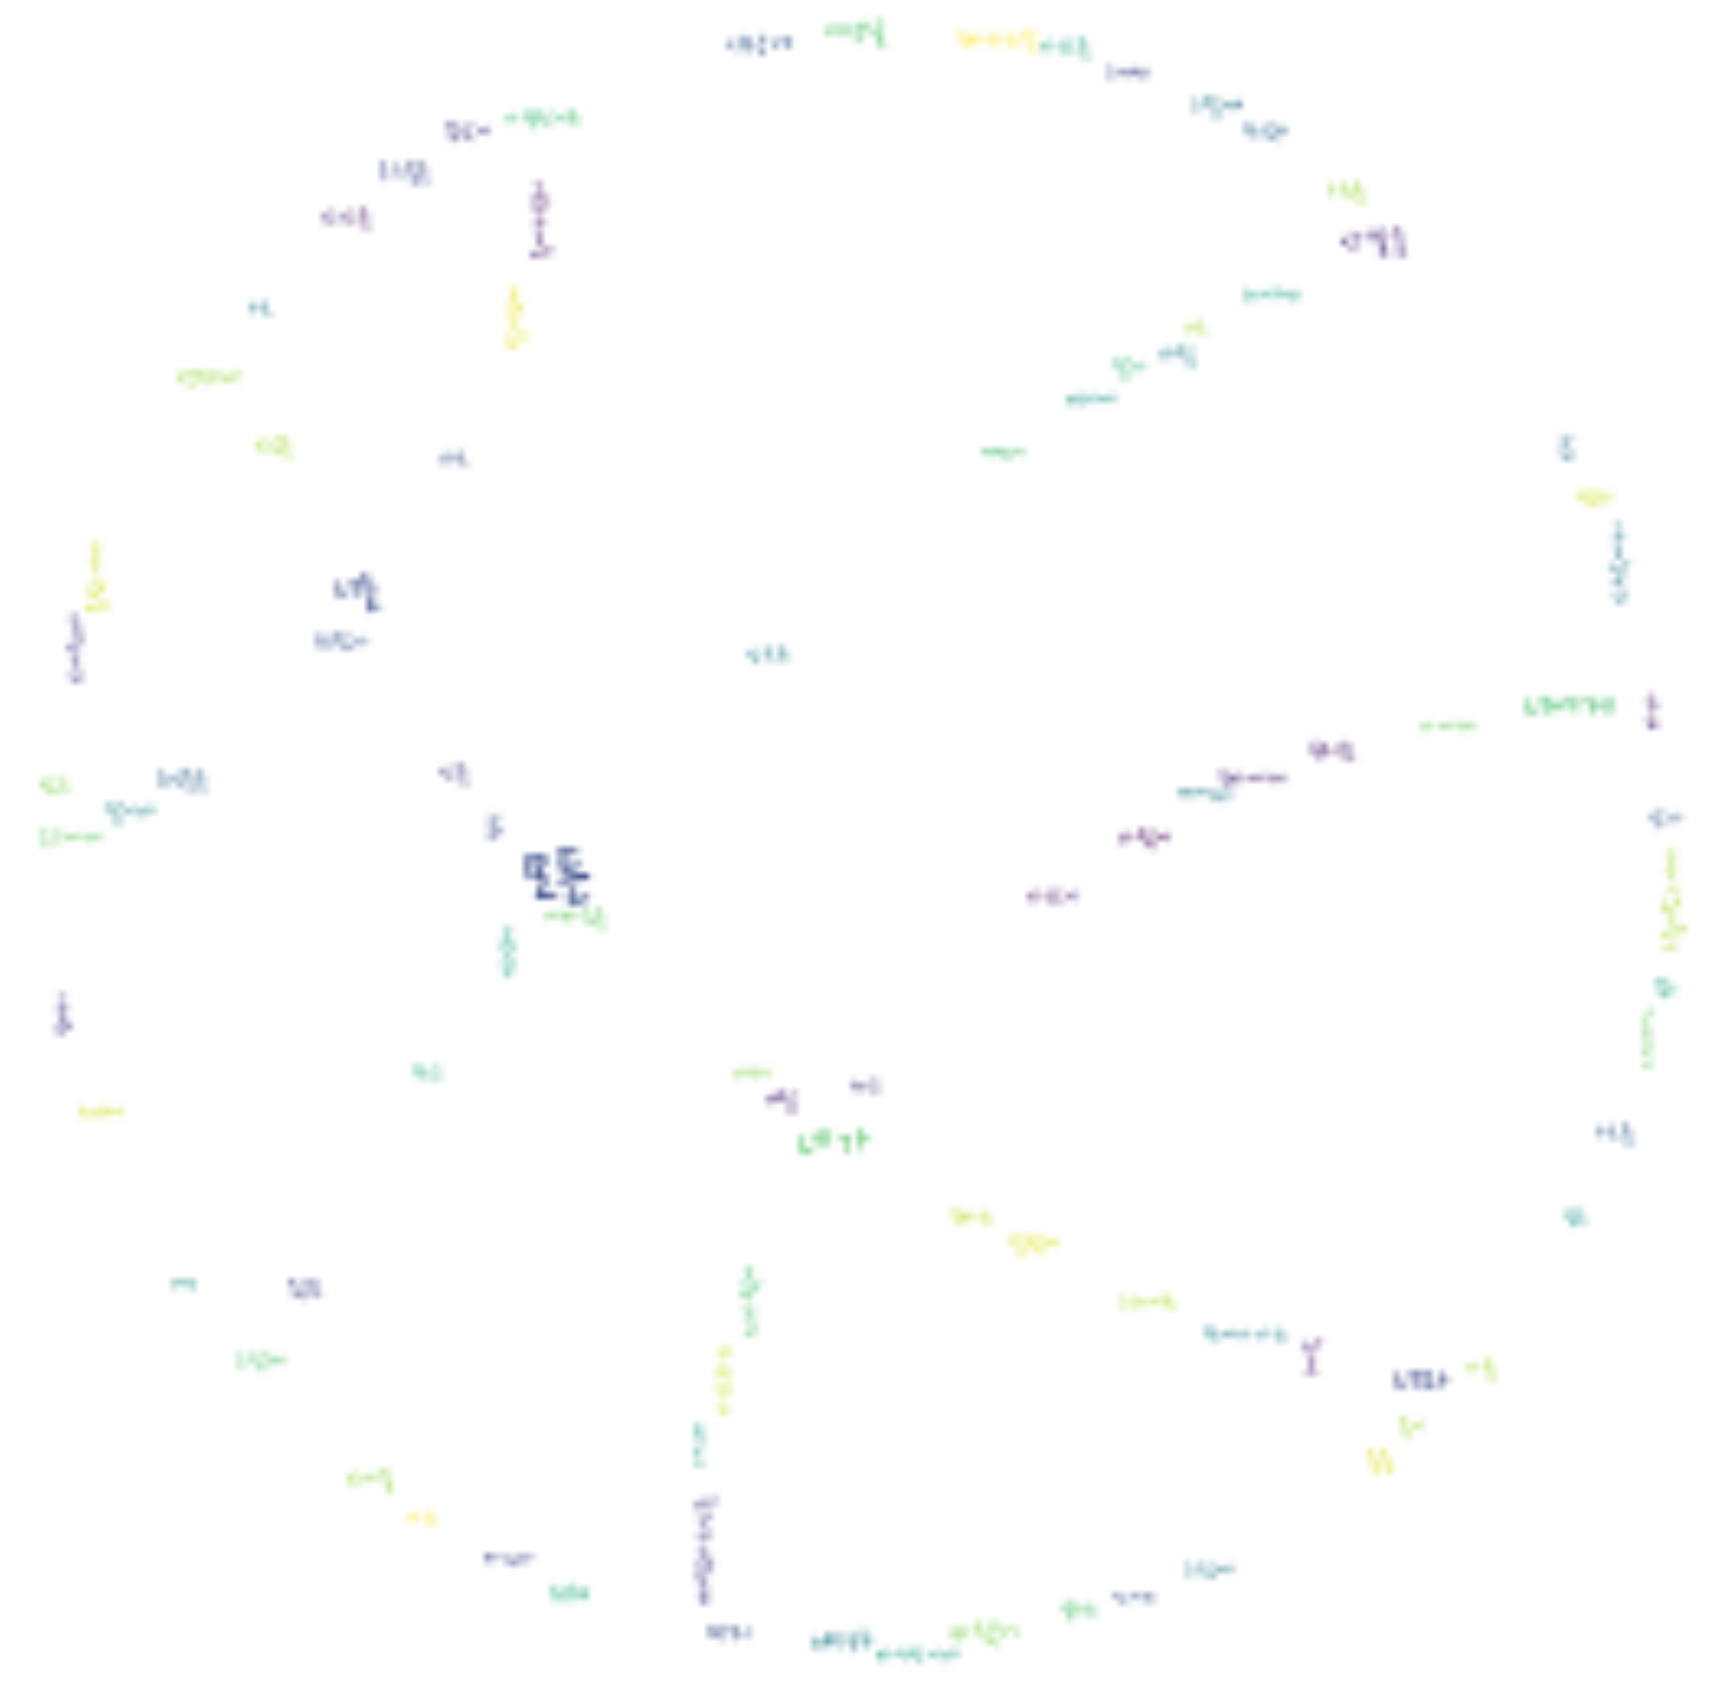

In [67]:
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()